### Import Modules

In [1]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2
import uuid
import os
import time
import tensorflow as tf
import PIL.Image as Image


2023-08-08 15:49:08.556456: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Data Augmentation

In [25]:
from tensorflow.keras import layers
path = os.path.join("images","train","images","100.jpeg")
IMG_SIZE = 220

resize = tf.keras.layers.Resizing(out_height, out_width)
zoom = tf.keras.layers.RandomZoom(0.3)
flip = tf.keras.layers.RandomFlip("horizontal_and_vertical")
rotate = tf.keras.layers.RandomRotation(0.2)
crop = tf.keras.layers.RandomCrop(out_height, out_width)
translation = tf.keras.layers.RandomTranslation(height_factor=0.2, width_factor=0.2)

brightness = tf.keras.layers.RandomBrightness([-0.8,0.8])
contrast = tf.keras.layers.RandomContrast(0.2)


NameError: name 'out_height' is not defined

annotate.ipynb  images/  result_img.jpeg       slot-images/  yolov5/
datasets/       labels/  slot-detection.ipynb  test_env/     yolov5s.pt


In [ ]:
#Rotation
directory = "images/train/images"

for i in os.listdir(directory):
    image = Image.open(f"{directory}/{i}")
    rotated_image = image.rotate(90)
    rotated_image.save(f"images/rotated_images/90/{i}", format="JPEG")


In [1]:
ls

annotate.ipynb  images.zip       slot-detection.ipynb  yolov5/
datasets/       labels/          slot-images/          yolov5s.pt
images/         result_img.jpeg  test_env/


In [3]:
# Brightness and contrast
directory = "images/train/images"

for i in os.listdir(directory):
        image = tf.keras.preprocessing.image.load_img("images/train/images/"+i)
        image = tf.keras.preprocessing.image.img_to_array(image)

        i = i[:-5]
        # #brightness
        # bright_image = tf.image.random_brightness(image,0.8)
        # bright_image = tf.keras.backend.eval(bright_image)
        # bright_image = Image.fromarray(bright_image.astype('uint8'))
        # bright_image.save(f"images/augmented_images/images/{i}_bright.jpeg")
        
        #contrast
        contrast_image = tf.image.random_contrast(image,0.5,1)
        contrast_image = tf.keras.backend.eval(contrast_image)
        contrast_image = Image.fromarray(contrast_image.astype('uint8'))
        contrast_image.save(f"images/augmented_images/images/{i}_contrast.jpeg")

In [7]:
cd ..

/home/cps/Documents/slot-detection/Slot-Detection


In [13]:
label_directory = "images/train/labels"

def add_tags(file_name):
    file = file_name
    file_name = file_name[:-4]
    bright = file_name + "_bright" 
    contrast = file_name + "_contrast"

    with open(label_directory+"/"+file, "r") as f:
        content = f.read()


    with open("images/augmented_images/labels/" + bright +".txt", "w") as f:
        f.write(content.upper())

    with open("images/augmented_images/labels/" + contrast+".txt", "w") as f:
        f.write(content.lower())


for i in os.listdir(label_directory):
    add_tags(i) 

In [ ]:
label_directory = "images/rotated_images/180_labels"

def add_tags(file_name):
    file = file_name
    file_name = file_name[:-4]
    bright = file_name + "_180" 
    contrast = file_name + "_180"

    with open(label_directory+"/"+file, "r") as f:
        content = f.read()


    with open("images/rotated_images/180_labels/" + bright +".txt", "w") as f:
        f.write(content.upper())

    with open("images/rotated_images/180_labels/" + contrast +".txt", "w") as f:
        f.write(content.lower())


for i in os.listdir(label_directory):
    add_tags(i) 

In [ ]:
cd Documents/slot-detection/Slot-Detection

/home/cps/Documents/slot-detection/Slot-Detection


In [ ]:
def rename_files(directory):
    for file in os.listdir(directory):
        if file.endswith(".jpeg"):
            new_file = f"{file[:-4]}_1.jpeg"
            os.rename(os.path.join(directory, file), os.path.join(directory, new_file))
        elif file.endswith(".png"):
            new_file = f"{file[:-4]}_1.png"
            os.rename(os.path.join(directory, file), os.path.join(directory, new_file))

rename_files("images/augmented_images/images/")

again
- resizing
- rescaling
- zoom
- crop
same
- brightness
- contrast
- hue?
- saturation?



### Annotation

In [ ]:
def isValidSpace(cropped_image):

    lower_black = np.array([0,0,0], dtype="uint8")
    upper_black = np.array([120,150,150],dtype = "uint8")

    if(DEBUG):
        print("Got Image: ")
        plt.imshow(cropped_image)
        plt.show()
    cropped_image = np.array(cropped_image)


    mask = cv2.inRange(cropped_image, lower_black, upper_black)
    zero_count = 0
    one_count = 0
    for i in mask:
        zero_count += list(i).count(0)
        one_count += list(i).count(255)
    
    if DEBUG:
        print(mask)
        print(f"The output is : {zero_count > one_count} \n zero_count: {zero_count}, one_count: {one_count}")

    if( zero_count > one_count):
        return True
    else:
        return False

In [ ]:
# Starting (x,y) coord of board = 464, 16

# side length of board = 850 pixels
# square length = 95 pixels 

# distance between two squares = 70 


def annotate_image(name):

    txt_file_name = f"{name.split('.')[0]}.txt"

    img = cv2.imread(f"dataset/{name}")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    start_point = [553, 112] # upper left coord of 1st square
    side_length = 73 # side length of square

    square_distance = 76

    image = img

    file = open(f"annotated/{txt_file_name}","w")

    if(DEBUG):
        print("Orignal Image: ")
        plt.imshow(img)
        plt.show()

    for j in range(5):

        for i in range(5):
            new_image=  []

            for i in range(start_point[1], start_point[1] +  side_length ):
                single_row = []
                for j in range(start_point[0], start_point[0] + side_length):
                    single_row.append(image[i][j])
                
                new_image.append(single_row)
            

            if(isValidSpace(new_image)):
                image = cv2.rectangle(image, start_point, (start_point[0] + side_length, start_point[1] + side_length), (255,0,0), 2)
                file.write(f"15  {int((start_point[0] + start_point[0] + 73)/2)/1655} {int((start_point[1] + start_point[1] + 73)/2)/931} {side_length/1655} {side_length/931}")
                file.write("\n")

            start_point[0] += side_length + square_distance 
        start_point[1]  += side_length + square_distance
        start_point[0] -= 5*(side_length+ square_distance)

    # plt.imshow(image)
    # plt.show()

    cv2.imwrite(f'annotated/{name}',cv2.cvtColor(image,cv2.COLOR_RGB2BGR))
    file.close()

In [ ]:
def list_png_files(directory):
    png_files = []
    for root, dirnames, filenames in os.walk(directory):
        for filename in fnmatch.filter(filenames, '*.png'):
            png_files.append(os.path.join(root, filename))
    return png_files

def list_jpeg_files(directory):
    png_files = []
    for root, dirnames, filenames in os.walk(directory):
        for filename in fnmatch.filter(filenames, '*.jpeg'):
            png_files.append(os.path.join(root, filename))
    return png_files
# Example usage
directory = 'dataset/'
png_files = list_png_files(directory)
for file in png_files:
    filename = file.split('/')[-1]
    print(filename)
    annotate_image(filename)

# annotate_image('20.png')

### Yolov5 Test

In [ ]:
model = torch.hub.load("ultralytics/yolov5", "yolov5s")

In [ ]:
model

In [ ]:
img = "https://ultralytics.com/images/zidane.jpg"

In [ ]:
results = model(img)
results.print()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow("YOLO",np.squeeze(results.render()))

    if cv2.waitKey(10) & 0XFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows() 

KeyboardInterrupt: 

### Custom Yolo Train

In [3]:
cd yolov5

/home/cps/Documents/slot-detection/Slot-Detection/yolov5


In [4]:
!python train.py --img 720 --batch 32 --epochs 50 --data dataset.yaml --weights yolov5s.pt --workers 20

train: weights=yolov5s.pt, cfg=, data=dataset.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=720, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=Adam, sync_bn=False, workers=20, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: skipping check (not a git repository), for updates see https://github.com/ultralytics/yolov5
YOLOv5 🚀 2023-8-2 Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA TITAN RTX, 24212MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.

In [5]:
cd ..

/home/cps/Documents/slot-detection/Slot-Detection


In [6]:
#latest model = 49

model = torch.hub.load("ultralytics/yolov5", "custom", path="yolov5/runs/train/exp49/weights/last.pt",force_reload=True)
# model.conf = 0.6

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /home/cps/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-8-8 Python-3.8.10 torch-2.0.1+cu117 CUDA:0 (NVIDIA TITAN RTX, 24212MiB)

Fusing layers... 
Model summary: 157 layers, 7053277 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [14]:
img = os.path.join("images","train","images","100.jpeg")

In [11]:
img = os.path.join("7.png")

In [15]:
results = model(img)

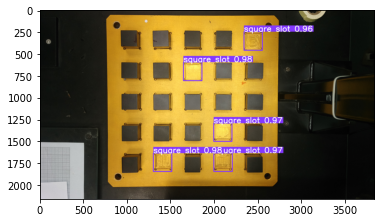

True

In [16]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()
cv2.imwrite("result_img.jpeg",np.squeeze(results.render()))

In [ ]:

def get_output(img_name):
    img = os.path.join("images","phone_images", "eval",img_name)
    results = model(img)
    print(results)
    # %matplotlib inline 
    # plt.imshow(np.squeeze(results.render()))
    output_path = os.path.join("images", "phone_images", "output", img_name )
    cv2.imwrite(output_path, np.squeeze(results.render()))
    # plt.show()

In [ ]:
import fnmatch

def list_jpg_files(directory):
    jpg_files = []
    for root, dirnames, filenames in os.walk(directory):
        for filename in fnmatch.filter(filenames, '*.jpeg'):
            jpg_files.append(os.path.join(root, filename))
    return jpg_files

# Example usage
directory = 'images/phone_images/eval'
jpg_files = list_jpg_files(directory)
for file in jpg_files:
    filename = file.split('/')[-1]
    print(filename)
    get_output(filename)
# get_output("1.jpeg")

### Yolo Realtime

In [ ]:
cap = cv2.VideoCapture(1)
while cap.isOpened():
    ret, frame = cap.read()
    results = model(frame)
    cv2.imshow("YOLO",np.squeeze(results.render()))

    if cv2.waitKey(10) & 0XFF == ord("q"):
        break
cap.release()
cv2.destroyAllWindows() 

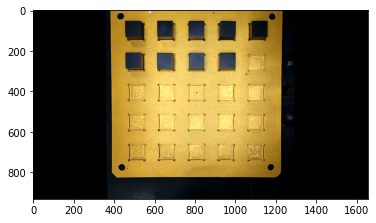

In [ ]:



%matplotlib inline 
plt.imshow(rotated_image)
plt.show()


In [18]:
from pathlib import Path
import depthai as dai

pipeline = dai.Pipeline()

camRgb = pipeline.create(dai.node.ColorCamera)
# camRgb.setBoardSocket(dai.CameraBoSGDardSocket.CAM_A)
camRgb.setResolution(dai.ColorCameraProperties.SensorResolution.THE_1080_P)

xoutRgb = pipeline.create(dai.node.XLinkOut)
xoutRgb.setStreamName("rgb")
camRgb.video.link(xoutRgb.input)

xin = pipeline.create(dai.node.XLinkIn)
xin.setStreamName("control")
xin.out.link(camRgb.inputControl)

videoEnc = pipeline.create(dai.node.VideoEncoder)
videoEnc.setDefaultProfilePreset(1, dai.VideoEncoderProperties.Profile.MJPEG)
camRgb.still.link(videoEnc.input)

xoutStill = pipeline.create(dai.node.XLinkOut)
xoutStill.setStreamName("still")
videoEnc.bitstream.link(xoutStill.input)

with dai.Device(pipeline) as device:

    qRgb = device.getOutputQueue(name="rgb", maxSize=30, blocking=False)
    qStill = device.getOutputQueue(name="still", maxSize=30, blocking=True)
    qControl = device.getInputQueue(name="control")

    while True:
        inRgb = qRgb.tryGet() 
        if inRgb is not None:
            frame = inRgb.getCvFrame()
            frame = cv2.pyrDown(frame)
            frame = cv2.pyrDown(frame)
            results = model(frame)
            cv2.imshow("Square Slot Detection", np.squeeze(results.render()))

        if cv2.waitKey(10) & 0XFF == ord('q'):
            break


KeyboardInterrupt: 

: 